#Question 1

##Subpart 1: Read, Visualize and Listen to data

In [9]:
import IPython
import copy
import numpy as np
import wave
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [10]:
mix_1_wave = wave.open( '/content/drive/MyDrive/Colab Notebooks/data_sets/Dataset(Lab8)/signal_1.wav','r')
mix_2_wave = wave.open( '/content/drive/MyDrive/Colab Notebooks/data_sets/Dataset(Lab8)/signal_2.wav','r')
mix_3_wave = wave.open( '/content/drive/MyDrive/Colab Notebooks/data_sets/Dataset(Lab8)/signal_3.wav','r')

'''Let's peak at the parameters of the wave file to learn more about it'''
print(mix_1_wave.getparams())
print(mix_2_wave.getparams())
print(mix_3_wave.getparams())

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')
_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')
_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')


In [11]:
'''Let's extract the frames of the wave file, which will be a part of the dataset we'll run ICA against:'''

# Extract Raw Audio from Wav File
signal_1_raw = mix_1_wave.readframes(-1)
signal_1 = np.fromstring(signal_1_raw, 'int16')

signal_2_raw = mix_2_wave.readframes(-1)
signal_2 = np.fromstring(signal_2_raw, 'int16')

signal_3_raw = mix_3_wave.readframes(-1)
signal_3 = np.fromstring(signal_3_raw, 'int16')

In [12]:
print('length: ', len(signal_1) , 'first 100 elements: ',signal_1[:100])
print('\n\n\n\nlength: ', len(signal_2) , 'first 100 elements: ',signal_2[:100])
print('\n\n\n\nlength: ', len(signal_3) , 'first 100 elements: ',signal_3[:100])

length:  264515 first 100 elements:  [-23 -16 -28 -11 -25 -15 -14 -19 -10 -17 -13  -8 -16  -8 -14  -9  -9 -14
  -6 -16  -1 -21   0 -21  -5 -13 -12 -10 -13 -13 -13 -13 -17 -11 -19 -13
 -18 -21 -13 -27 -13 -25 -21 -25 -21 -28 -20 -35 -17 -38 -19 -34 -25 -30
 -23 -32 -24 -29 -25 -19 -28 -15 -27 -14 -20 -14 -17  -9 -15  -8  -9 -10
  -1 -11   3 -13   7  -7   0   5  -8  10 -10  15 -12  16  -9   9   1   1
   4   0   1   7  -2   6  -1   3   2   0]




length:  264515 first 100 elements:  [  -52  -624 -1178 -1740 -2282 -2827 -3351 -3870 -4370 -4856 -5321 -5769
 -6192 -6594 -6969 -7319 -7640 -7931 -8194 -8421 -8620 -8780 -8912 -9002
 -9062 -9083 -9071 -9022 -8938 -8819 -8665 -8480 -8259 -8009 -7725 -7415
 -7071 -6706 -6311 -5892 -5453 -4988 -4506 -4008 -3492 -2962 -2423 -1869
 -1313  -746  -180   392   959  1529  2089  2647  3192  3727  4248  4753
  5242  5708  6156  6575  6975  7342  7685  7994  8274  8521  8733  8914
  9055  9164  9234  9271  9266  9228  9151  9038  8892  8705  8493  8236
  79

###Visualizing Audio files

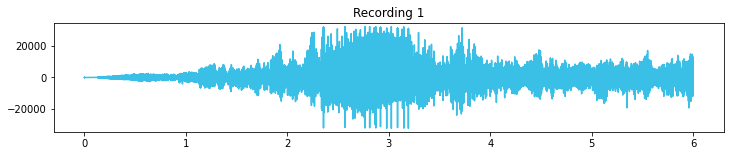

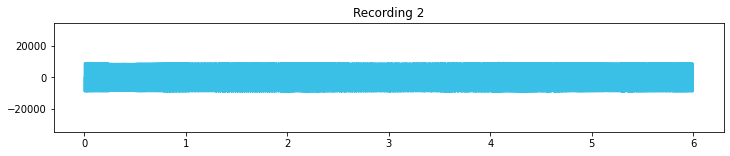

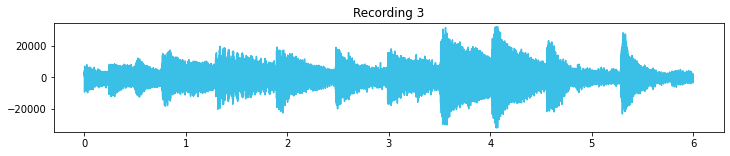

In [13]:
import matplotlib.pyplot as plt
#wave 1
fs = mix_1_wave.getframerate()
timing = np.linspace(0, len(signal_1)/fs, num=len(signal_1))

plt.figure(figsize=(12,2))
plt.title('Recording 1')
plt.plot(timing,signal_1, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show();

#wave 2
fs = mix_2_wave.getframerate()
timing = np.linspace(0, len(signal_2)/fs, num=len(signal_2))

plt.figure(figsize=(12,2))
plt.title('Recording 2')
plt.plot(timing,signal_2, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show();


#wave 3
fs = mix_3_wave.getframerate()
timing = np.linspace(0, len(signal_3)/fs, num=len(signal_3))

plt.figure(figsize=(12,2))
plt.title('Recording 3')
plt.plot(timing,signal_3, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show();

###Listening to Auido

In [14]:
print('Audio file 1')
IPython.display.Audio('/content/drive/MyDrive/Colab Notebooks/data_sets/Dataset(Lab8)/signal_1.wav')



Audio file 1


In [15]:

print('Audio file 2')
IPython.display.Audio('/content/drive/MyDrive/Colab Notebooks/data_sets/Dataset(Lab8)/signal_2.wav')

Audio file 2


In [16]:

print('Audio file 3')
IPython.display.Audio('/content/drive/MyDrive/Colab Notebooks/data_sets/Dataset(Lab8)/signal_3.wav')

Audio file 3


##Subpart 2: Extracting raw audio and merging the 3 files

In [17]:
X = list(zip(signal_1, signal_2, signal_3))
X_ = [signal_1, signal_2, signal_3]

for i in range(10):
  print(X[i])

(-23, -52, 2142)
(-16, -624, 2328)
(-28, -1178, 2010)
(-11, -1740, 1989)
(-25, -2282, 1671)
(-15, -2827, 1605)
(-14, -3351, 1344)
(-19, -3870, 1262)
(-10, -4370, 1066)
(-17, -4856, 976)


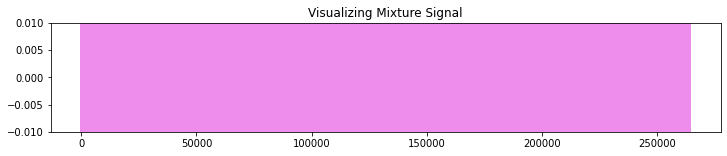

In [18]:
plt.figure(figsize=(12,2))
plt.title('Visualizing Mixture Signal')
plt.plot(X, c="#ef8ded")
plt.ylim(-0.010, 0.010)
plt.show()

##Subpart 3: Implementing ICA from scratch

In [19]:
def tanh(x):
    return np.tanh(x)
def anti_tanh(x):
    return 1 - tanh(x)**2

In [20]:
def ica(X, iterations, tolerance=1e-5):
    X= np.array(X)
    mean= X.mean(axis=1, keepdims=True)
    X= X-mean
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< technique 1 for whitenning
    # cov = np.cov(X)
    # d, E = np.linalg.eigh(cov)
    # D = np.diag(d)
    # D_inv = np.sqrt(np.linalg.inv(D))
    # X_whiten = np.dot(E, np.dot(D_inv, np.dot(E.T, X)))
    # X= X_whiten
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<technique 2
    U, s, Vt = np.linalg.svd(X, full_matrices=False)
    X = np.dot(U, Vt)
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

    comp_nr = X.shape[0]
    W = np.zeros((comp_nr, comp_nr), dtype=X.dtype)
    for i in range(comp_nr):
        
        w = np.random.rand(comp_nr)
        for j in range(iterations):
            
            #w_new = calculate_new_w(w, X) <<<<??????????????????????????????
            #<<<<<<<<<<<<<cal w_new
            w_new = (X * np.tanh(np.dot(w.T, X))).mean(axis=1) - (  1-np.tanh(np.dot(w.T, X)**2 )).mean() * w
            w_new /= np.sqrt((w_new ** 2).sum())
            #<<<<<<<<<<<<<<<<<
            if i >= 1:
                w_new -= np.dot(np.dot(w_new, W[:i].T), W[:i])
            distance = np.abs(np.abs((w * w_new).sum()) - 1)
            
            w = w_new
            if distance < tolerance:
                break
                
        W[i, :] = w   
    S = np.dot(W, X)
    
    return S

In [58]:
def plot_mixture_sources_predictions(X, original_sources, S):
    fig = plt.figure()
    for x in X:
        plt.plot(x)
        plt.title("mixtures")
        plt.show()

    for s in original_sources:
        plt.plot(s)
        plt.title("real sources")
        plt.show()

    for s in S:
        plt.plot(s)
        plt.title("predicted sources")
        plt.show() 
    
    fig.tight_layout()
    plt.show()

In [22]:
S = ica(X_, iterations=1000)

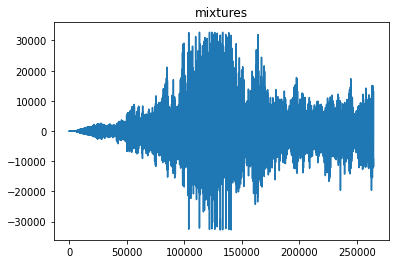

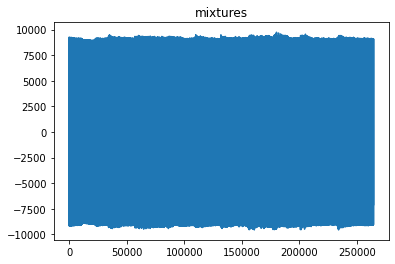

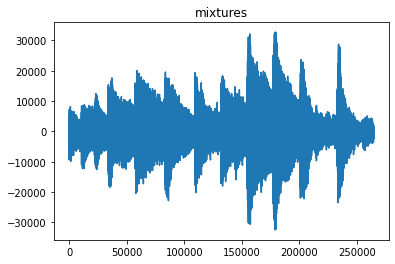

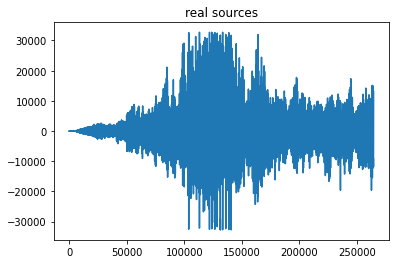

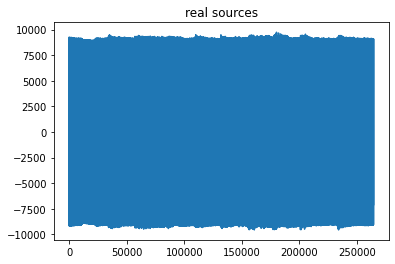

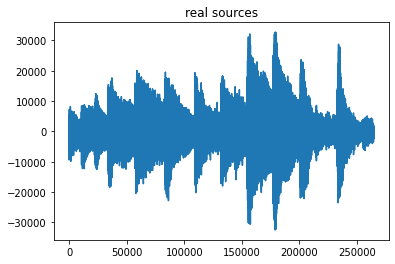

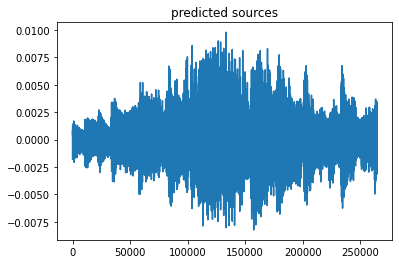

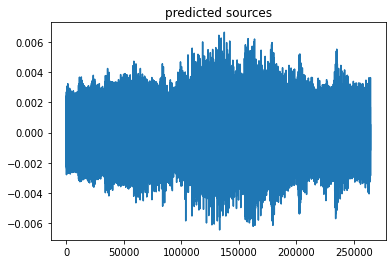

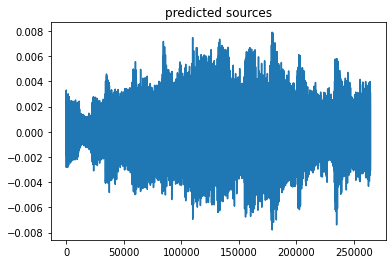

In [59]:
plot_mixture_sources_predictions(X_, [signal_1, signal_2, signal_3], S)


In [24]:
result_signal_1 = S[0]
result_signal_2 = S[1]
result_signal_3 = S[2]

from scipy.io import wavfile

# Converting to int, mapping the appropriate range, and increasing the volume a little bit
result_signal_1_int = np.int16(result_signal_1*32767*100)
result_signal_2_int = np.int16(result_signal_2*32767*100)
result_signal_3_int = np.int16(result_signal_3*32767*100)

# Writing wave files
wavfile.write("result_signal_1.wav", fs, result_signal_1_int)
wavfile.write("result_signal_2.wav", fs, result_signal_2_int)
wavfile.write("result_signal_3.wav", fs, result_signal_3_int)



In [25]:
'''recovered audio #1'''
print('Recovered Audio file 1')
IPython.display.Audio("result_signal_1.wav")

Recovered Audio file 1


In [26]:
'''recovered audio #2'''
print('Recovered Audio file 2')
IPython.display.Audio("result_signal_2.wav")

Recovered Audio file 2


In [27]:
'''recovered audio #3'''
print('Recovered Audio file 3')
IPython.display.Audio("result_signal_3.wav")

Recovered Audio file 3


##Subpart 5 and 6: Implement Fast ICA and analysing our results

In [28]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=3)
ica_result = ica.fit_transform(X)

print(ica_result.shape)

(264515, 3)


In [29]:
'''lets split the signals'''

result_signal_1 = ica_result[:,0]
result_signal_2 = ica_result[:,1]
result_signal_3 = ica_result[:,2]



###Results

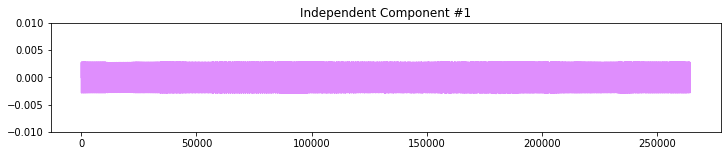

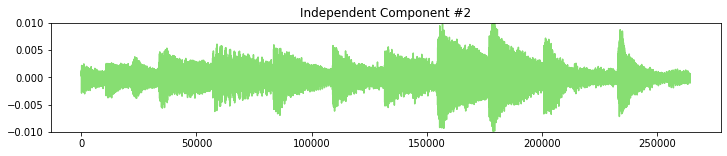

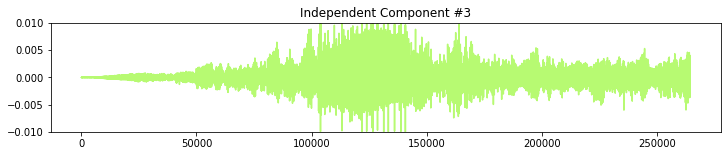

In [30]:
# Independent Component #1
plt.figure(figsize=(12,2))
plt.title('Independent Component #1')
plt.plot(result_signal_1, c="#df8efd")
plt.ylim(-0.010, 0.010)
plt.show()

# Independent Component #2
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(result_signal_2, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()

# Independent Component #3
plt.figure(figsize=(12,2))
plt.title('Independent Component #3')
plt.plot(result_signal_3, c="#b7fa72")
plt.ylim(-0.010, 0.010)
plt.show()

In [31]:
from scipy.io import wavfile

# Converting to int, mapping the appropriate range, and increasing the volume a little bit
result_signal_1_int = np.int16(result_signal_1*32767*100)
result_signal_2_int = np.int16(result_signal_2*32767*100)
result_signal_3_int = np.int16(result_signal_3*32767*100)

# Writing wave files
wavfile.write("result_signal_1.wav", fs, result_signal_1_int)
wavfile.write("result_signal_2.wav", fs, result_signal_2_int)
wavfile.write("result_signal_3.wav", fs, result_signal_3_int)

In [32]:
'''recovered audio #1'''
print('Recovered Audio file 1')
IPython.display.Audio("result_signal_1.wav")

Recovered Audio file 1


In [33]:
'''recovered audio #2'''
print('Recovered Audio file 2')
IPython.display.Audio("result_signal_2.wav")

Recovered Audio file 2


In [34]:
'''recovered audio #3'''
print('Recovered Audio file 3')
IPython.display.Audio("result_signal_3.wav")

Recovered Audio file 3


##Subpart 7: Comment 

hmmmmmmmmmmmmmmmmm

#Question 2




In [35]:
!pip install mlxtend

import joblib

import sys
sys.modules['sklearn.externals.joblib'] = joblib

from sklearn import preprocessing
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


##subpart 1: data preprocessing and visualization

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

train_data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_sets/airline_data/train.csv')
test_data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_sets/airline_data/test.csv')


print('info of train data')
print(train_data.info())
print('\n\n\n\ninfo of test data')
print(test_data.info())

train_data.dropna(inplace= True)
test_data.dropna(inplace= True)

info of train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location       

In [37]:
'''as we dont have any missing values, no particular data cleaning required
  but we need to Encode the following features
      'Gender','Customer Type','Type of Travel','Class','satisfaction'''

def encoder( data, cat_features ):
  le = preprocessing.LabelEncoder()
  for i in cat_features :
    le.fit(data[ i])
    data[ i] = le.transform(data[ i])
  return data
 

cat_features = ['Gender','Customer Type','Type of Travel','Class','satisfaction']
train_data = encoder(train_data , cat_features )

print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  int64  
 3   Customer Type                      103594 non-null  int64  
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  int64  
 6   Class                              103594 non-null  int64  
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      1035

In [38]:
'''similarly for test_data'''

test_data = encoder(test_data , cat_features )

'''this completes our data pre-processing.
now we separate labels and features'''

X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]


##Subpart 2: Creating SFS object

In [39]:

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
sfs1 = SFS(clf,k_features=10, forward=True, floating=False,scoring='accuracy')

##Subpart 3: Training and reporting

In [40]:
sfs1.fit( X_train, y_train)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(random_state=0),
                          k_features=10, scoring='accuracy')

In [41]:
print(f"best accuracy achieved: {sfs1.k_score_} ")
print(f"best features are: {sfs1.k_feature_names_}")


best accuracy achieved: 0.9506631738158859 
best features are: ('Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Gate location', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'Baggage handling', 'Inflight service')


##Subpart 4: Toggling

###Implementing SBS from scratch


In [42]:
def sbs_scratch( model, X, y, features):
  feat=[]
  for i in range(len(X.columns)-features):
    worst_col= None
    best_acc= -69
    for j in (X.columns):
      X_ = X.drop(feat,axis=1)
      if(j not in feat):
        X_ = X_.drop([j],axis=1)
      else :
        continue
      correctness=cross_val_score(model,X_,y,cv=5).mean()
      if(correctness>best_acc):
        worst_col=j
        best_acc=correctness
    feat.append(worst_col)
  out=[]
  for i in X.columns:
    if i  not in feat:
      out.append(i)
  
  score= cross_val_score( model, X[out], y, cv=5).mean()
  return [out, score]

features_sbs_scratch= sbs_scratch( clf, X_train.head(10000), y_train.head(10000), 10)
print('best features with SBS from scratch is: ', features_sbs_scratch[0])
print('accuracy of SBS scratch is: ', features_sbs_scratch[1])

best features with SBS from scratch is:  ['Customer Type', 'Type of Travel', 'Inflight wifi service', 'Gate location', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Baggage handling', 'Inflight service']
accuracy of SBS scratch is:  0.9346


In [43]:

sfs = SFS(clf,k_features=10, forward=True, floating=False,scoring='accuracy', cv=4)
sbs = SFS(clf,k_features=10, forward=False, floating=False,scoring='accuracy',  cv=4)
sffs = SFS(clf,k_features=10, forward=True, floating=True,scoring='accuracy',  cv=4)
sbfs = SFS(clf,k_features=10, forward=False, floating=True,scoring='accuracy',  cv=4)

In [44]:
sfs.fit( X_train, y_train)
sbs.fit( X_train.head(10000).values , y_train.head(10000))
sffs.fit( X_train.head(10000).values , y_train.head(10000))
sbfs.fit( X_train.head(10000).values , y_train.head(10000))

SequentialFeatureSelector(cv=4,
                          estimator=DecisionTreeClassifier(random_state=0),
                          floating=True, forward=False, k_features=10,
                          scoring='accuracy')

In [45]:
sfs_pd= pd.DataFrame.from_dict( sfs.get_metric_dict()).T
sbs_pd= pd.DataFrame.from_dict( sbs.get_metric_dict()).T
sffs_pd= pd.DataFrame.from_dict( sffs.get_metric_dict()).T
sbfs_pd= pd.DataFrame.from_dict( sbfs.get_metric_dict()).T

In [46]:
print('for SFS')
print(f"best accuracy achieved: {sfs.k_score_} ")
print(f" cv scores are: ", sfs_pd["cv_scores"][10] )
print('\n')

print('for SBS')
print(f"best accuracy achieved: {sbs.k_score_} ")
print(" cv scores are: ",sbs_pd["cv_scores"][10])
print('\n')

print('for SFFS')
print(f"best accuracy achieved: {sffs.k_score_} ")
print("cv scores are: ", sffs_pd["cv_scores"][10])
print('\n')

print('for SBFS')
print(f"best accuracy achieved: {sbfs.k_score_} ")
print(" cv scores are: ", sbfs_pd["cv_scores"][10])

for SFS
best accuracy achieved: 0.9499198910655715 
 cv scores are:  [0.94883972 0.94980501 0.94976446 0.95127037]


for SBS
best accuracy achieved: 0.9301 
 cv scores are:  [0.9264 0.9312 0.9368 0.926 ]


for SFFS
best accuracy achieved: 0.9391 
cv scores are:  [0.934  0.9428 0.9424 0.9372]


for SBFS
best accuracy achieved: 0.9387 
 cv scores are:  [0.938  0.9424 0.942  0.9324]


##Subpart 5: Summarise

In [47]:
sfs_pd

feature_idx  \
1                                  (13,)   
2                                (5, 13)   
3                             (5, 8, 13)   
4                         (5, 8, 11, 13)   
5                      (3, 5, 8, 11, 13)   
6                  (3, 5, 8, 11, 13, 18)   
7               (3, 5, 6, 8, 11, 13, 18)   
8           (3, 5, 6, 8, 11, 13, 18, 20)   
9       (3, 5, 6, 8, 11, 13, 14, 18, 20)   
10  (3, 5, 6, 8, 11, 13, 14, 15, 18, 20)   

                                            cv_scores avg_score  \
1   [0.7897602224024094, 0.7918066334607514, 0.793...  0.790335   
2   [0.8483339125062743, 0.8511911656820726, 0.850...  0.849615   
3   [0.8914629908490675, 0.8920421637901077, 0.892...  0.891249   
4   [0.9192246804895942, 0.9228927757828488, 0.922...  0.921733   
5   [0.9277578284875864, 0.9284914475462374, 0.929...  0.928828   
6   [0.9393412873083903, 0.9425846557782154, 0.939...    0.9413   
7   [0.9462913626008727, 0.9488011120120468, 0.948...  0.948269   
8   [0.9495347310706977, 0.9503455731881539, 0.950...  0.950615   
9   [0.9488397235414495, 0.9508089115409861, 0.951...   0.95076   
10  [0.9488397235414495, 0.9498050117765164, 0.949...   0.94992   

                                        feature_names  ci_bound   std_dev  \
1                                  (Online boarding,)  0.004065  0.002536   
2                   (Type of Travel, Online boarding)  0.002085    0.0013   
3   (Type of Travel, Inflight wifi service, Online...  0.002214  0.001381   
4   (Type of Travel, Inflight wifi service, Gate l...  0.002346  0.001463   
5   (Customer Type, Type of Travel, Inflight wifi ...  0.001202   0.00075   
6   (Customer Type, Type of Travel, Inflight wifi ...  0.002925  0.001825   
7   (Customer Type, Type of Travel, Class, Infligh...  0.001897  0.001183   
8   (Customer Type, Type of Travel, Class, Infligh...  0.001315  0.000821   
9   (Customer Type, Type of Travel, Class, Infligh...   0.00193  0.001204   
10  (Customer Type, Type of Travel, Class, Infligh...  0.001395   0.00087   

     std_err  
1   0.001464  
2   0.000751  
3   0.000797  
4   0.000845  
5   0.000433  
6   0.001053  
7   0.000683  
8   0.000474  
9   0.000695  
10  0.000502

In [48]:
sbs_pd

feature_idx  \
24  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
23  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
22  (1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...   
21  (1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...   
20  (1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, ...   
19  (1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16,...   
18  (1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16,...   
17  (1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16,...   
16  (1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16,...   
15  (1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16,...   
14  (1, 3, 4, 5, 8, 10, 11, 12, 13, 14, 15, 16, 18...   
13   (1, 3, 5, 8, 10, 11, 12, 13, 14, 15, 16, 18, 19)   
12       (1, 3, 5, 8, 11, 12, 13, 14, 15, 16, 18, 19)   
11           (1, 3, 5, 8, 11, 12, 13, 14, 15, 16, 18)   
10              (3, 5, 8, 11, 12, 13, 14, 15, 16, 18)   

                           cv_scores avg_score  \
24  [0.9148, 0.9264, 0.9312, 0.8868]    0.9148   
23    [0.914, 0.9196, 0.9208, 0.928]    0.9206   
22  [0.9156, 0.9304, 0.9308, 0.9252]    0.9255   
21    [0.9228, 0.9296, 0.93, 0.9244]    0.9267   
20   [0.9204, 0.932, 0.9296, 0.9316]    0.9284   
19  [0.9256, 0.9256, 0.9292, 0.9308]    0.9278   
18  [0.9196, 0.9256, 0.9344, 0.9344]    0.9285   
17   [0.9244, 0.928, 0.9312, 0.9304]    0.9285   
16  [0.9236, 0.9304, 0.9312, 0.9252]    0.9276   
15    [0.93, 0.9328, 0.9296, 0.9248]    0.9293   
14   [0.924, 0.9284, 0.9308, 0.9256]    0.9272   
13   [0.9268, 0.9216, 0.932, 0.9268]    0.9268   
12  [0.9284, 0.9256, 0.9276, 0.9272]    0.9272   
11    [0.93, 0.9216, 0.9312, 0.9264]    0.9273   
10   [0.9264, 0.9312, 0.9368, 0.926]    0.9301   

                                        feature_names  ci_bound   std_dev  \
24  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   0.02762   0.01723   
23  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  0.007989  0.004984   
22  (1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...  0.009823  0.006128   
21  (1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...  0.005056  0.003154   
20  (1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, ...  0.007546  0.004707   
19  (1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16,...  0.003641  0.002272   
18  (1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16,...   0.01005   0.00627   
17  (1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16,...  0.004238  0.002644   
16  (1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16,...  0.005229  0.003262   
15  (1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16,...   0.00461  0.002876   
14  (1, 3, 4, 5, 8, 10, 11, 12, 13, 14, 15, 16, 18...   0.00418  0.002608   
13   (1, 3, 5, 8, 10, 11, 12, 13, 14, 15, 16, 18, 19)  0.005894  0.003677   
12       (1, 3, 5, 8, 11, 12, 13, 14, 15, 16, 18, 19)  0.001635   0.00102   
11           (1, 3, 5, 8, 11, 12, 13, 14, 15, 16, 18)  0.005987  0.003735   
10              (3, 5, 8, 11, 12, 13, 14, 15, 16, 18)  0.007015  0.004376   

     std_err  
24  0.009948  
23  0.002877  
22  0.003538  
21  0.001821  
20  0.002718  
19  0.001311  
18   0.00362  
17  0.001526  
16  0.001883  
15   0.00166  
14  0.001506  
13  0.002123  
12  0.000589  
11  0.002156  
10  0.002527

In [49]:
sffs_pd

feature_idx                         cv_scores  \
1                                  (13,)  [0.7788, 0.7864, 0.7816, 0.7892]   
2                                (5, 13)   [0.8444, 0.8456, 0.844, 0.8512]   
3                             (5, 8, 13)   [0.888, 0.8936, 0.8868, 0.8912]   
4                         (5, 8, 13, 18)   [0.912, 0.9144, 0.9152, 0.9252]   
5                      (3, 5, 8, 13, 18)   [0.9272, 0.9336, 0.936, 0.9332]   
6                  (3, 5, 8, 13, 14, 18)   [0.9332, 0.9316, 0.942, 0.9332]   
7               (3, 5, 6, 8, 13, 14, 18)  [0.9352, 0.9296, 0.9404, 0.9332]   
8           (3, 5, 6, 8, 13, 14, 18, 20)    [0.9356, 0.9372, 0.944, 0.932]   
9       (3, 5, 6, 8, 13, 14, 15, 18, 20)   [0.9356, 0.9416, 0.9412, 0.934]   
10  (3, 5, 6, 8, 11, 13, 14, 15, 18, 20)   [0.934, 0.9428, 0.9424, 0.9372]   

   avg_score                         feature_names  ci_bound   std_dev  \
1      0.784                                 (13,)  0.006492   0.00405   
2     0.8463                               (5, 13)  0.004632   0.00289   
3     0.8899                            (5, 8, 13)  0.004286  0.002674   
4     0.9167                        (5, 8, 13, 18)   0.00809  0.005047   
5     0.9325                     (3, 5, 8, 13, 18)  0.005197  0.003242   
6      0.935                 (3, 5, 8, 13, 14, 18)  0.006562  0.004094   
7     0.9346              (3, 5, 6, 8, 13, 14, 18)  0.006258  0.003904   
8     0.9372          (3, 5, 6, 8, 13, 14, 18, 20)   0.00698  0.004354   
9     0.9381      (3, 5, 6, 8, 13, 14, 15, 18, 20)  0.005372  0.003351   
10    0.9391  (3, 5, 6, 8, 11, 13, 14, 15, 18, 20)  0.005901  0.003681   

     std_err  
1   0.002338  
2   0.001668  
3   0.001544  
4   0.002914  
5   0.001872  
6   0.002364  
7   0.002254  
8   0.002514  
9   0.001935  
10  0.002125

In [50]:
sbfs_pd

feature_idx  \
24  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
23  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
22  (1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...   
21  (1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...   
20  (1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, ...   
19  (1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16,...   
18  (1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16,...   
17  (1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16,...   
16  (1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16,...   
15  (3, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 18, 1...   
14  (3, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 18, 1...   
13  (3, 5, 8, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20)   
12      (3, 5, 8, 10, 12, 13, 14, 15, 18, 19, 20, 21)   
11          (3, 5, 8, 10, 12, 13, 14, 15, 18, 20, 21)   
10              (3, 5, 8, 10, 13, 14, 15, 18, 20, 21)   

                           cv_scores avg_score  \
24  [0.9148, 0.9264, 0.9312, 0.8868]    0.9148   
23    [0.914, 0.9196, 0.9208, 0.928]    0.9206   
22  [0.9156, 0.9304, 0.9308, 0.9252]    0.9255   
21    [0.9228, 0.9296, 0.93, 0.9244]    0.9267   
20   [0.9204, 0.932, 0.9296, 0.9316]    0.9284   
19  [0.9256, 0.9256, 0.9292, 0.9308]    0.9278   
18  [0.9196, 0.9256, 0.9344, 0.9344]    0.9285   
17   [0.9244, 0.928, 0.9312, 0.9304]    0.9285   
16  [0.9236, 0.9304, 0.9312, 0.9252]    0.9276   
15   [0.9304, 0.9344, 0.9372, 0.928]    0.9325   
14   [0.9288, 0.9328, 0.9348, 0.936]    0.9331   
13     [0.9332, 0.93, 0.936, 0.9304]    0.9324   
12    [0.9352, 0.9352, 0.94, 0.9308]    0.9353   
11  [0.9384, 0.9392, 0.9396, 0.9284]    0.9364   
10    [0.938, 0.9424, 0.942, 0.9324]    0.9387   

                                        feature_names  ci_bound   std_dev  \
24  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   0.02762   0.01723   
23  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  0.007989  0.004984   
22  (1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...  0.009823  0.006128   
21  (1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...  0.005056  0.003154   
20  (1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, ...  0.007546  0.004707   
19  (1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16,...  0.003641  0.002272   
18  (1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16,...   0.01005   0.00627   
17  (1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16,...  0.004238  0.002644   
16  (1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16,...  0.005229  0.003262   
15  (3, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 18, 1...  0.005688  0.003548   
14  (3, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 18, 1...  0.004381  0.002733   
13  (3, 5, 8, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20)  0.003874  0.002417   
12      (3, 5, 8, 10, 12, 13, 14, 15, 18, 19, 20, 21)  0.005216  0.003254   
11          (3, 5, 8, 10, 12, 13, 14, 15, 18, 20, 21)  0.007436  0.004639   
10              (3, 5, 8, 10, 13, 14, 15, 18, 20, 21)   0.00645  0.004024   

     std_err  
24  0.009948  
23  0.002877  
22  0.003538  
21  0.001821  
20  0.002718  
19  0.001311  
18   0.00362  
17  0.001526  
16  0.001883  
15  0.002049  
14  0.001578  
13  0.001395  
12  0.001879  
11  0.002678  
10  0.002323

##Subpart 6: Plotting

Text(0.5, 1.0, 'SFS')

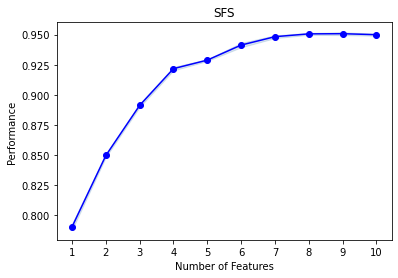

In [51]:
from mlxtend.plotting import plot_sequential_feature_selection as sfs_plt

fig= sfs_plt( sfs.get_metric_dict(), kind= 'std_dev')
plt.title('SFS')

Text(0.5, 1.0, 'SBS')

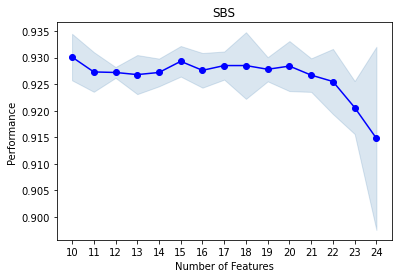

In [52]:
from mlxtend.plotting import plot_sequential_feature_selection as sfs_plt

fig= sfs_plt( sbs.get_metric_dict(), kind= 'std_dev')
plt.title('SBS')

Text(0.5, 1.0, 'SFFS')

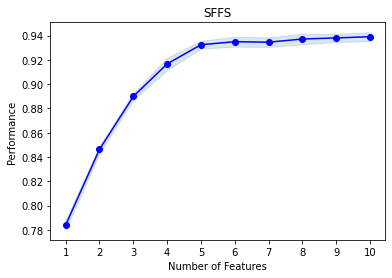

In [53]:
from mlxtend.plotting import plot_sequential_feature_selection as sfs_plt

fig= sfs_plt( sffs.get_metric_dict(), kind= 'std_dev')
plt.title('SFFS')

Text(0.5, 1.0, 'SBFS')

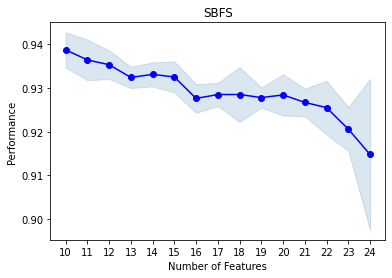

In [54]:
from mlxtend.plotting import plot_sequential_feature_selection as sfs_plt

fig= sfs_plt( sbfs.get_metric_dict(), kind= 'std_dev')
plt.title('SBFS')

##Subpart 7: vary the features and report results

In [55]:
features= [3, 5, 7, 9, 13, 17, 21, 24]

acc_sfs=[]

for feature_count in range(4,25, 3):
  clf = DecisionTreeClassifier(random_state=0)
  sfs1 = SFS(clf,k_features= feature_count, forward=True, floating=False,scoring='accuracy')
  sfs1.fit( X_train, y_train)
  print(f"best accuracy achieved with {feature_count} features is: {sfs1.k_score_} ")
  acc_sfs.append( sfs1.k_score_)


best accuracy achieved with 4 features is: 0.9217136206489922 
best accuracy achieved with 7 features is: 0.9486746417539573 
best accuracy achieved with 10 features is: 0.9506631738158859 
best accuracy achieved with 13 features is: 0.9486842942635649 
best accuracy achieved with 16 features is: 0.945894566164515 
best accuracy achieved with 19 features is: 0.9462034469378782 
best accuracy achieved with 22 features is: 0.9464351276690346 


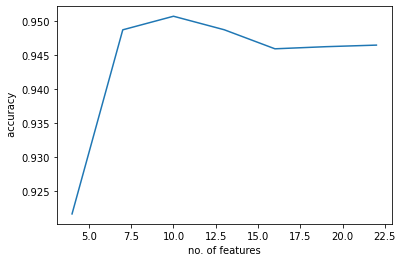

In [56]:
x= np.arange(4 ,25, 3)
plt.plot(x, acc_sfs )
plt.xlabel('no. of features')
plt.ylabel(' accuracy')
plt.show()